###Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

###Extract Data

In [ ]:
df=pd.read_csv('WA_Fn-UseC_-IT-Help-Desk.csv')

###Data Profiling

In [ ]:
df.head()

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction
0,1,1929,1 - Junior,50,Systems,Issue,2 - Normal,0 - Unassigned,3,1 - Unsatisfied
1,2,1587,2 - Regular,15,Software,Request,1 - Minor,1 - Low,5,1 - Unsatisfied
2,3,925,2 - Regular,15,Access/Login,Request,2 - Normal,0 - Unassigned,0,0 - Unknown
3,4,413,4 - Management,22,Systems,Request,2 - Normal,0 - Unassigned,20,0 - Unknown
4,5,318,1 - Junior,22,Access/Login,Request,2 - Normal,1 - Low,1,1 - Unsatisfied


###Transform Data

In [ ]:
def clean_satisfaction(value):
    if value == '0 - Unknown':
        return '0 - Neutral'
    return value
df['Satisfaction'] = df['Satisfaction'].apply(clean_satisfaction)

In [ ]:
def clean_satisfaction_column(df):
    mapping = {
    '1 - Unsatisfied': '1 - Unsatisfied',
    '0 - Neutral': '2 - Neutral',
    '2 - Satisfied': '3 - Satisfied',
    '3 - Highly Satisfied': '4 - Highly Satisfied'
    }
    df['Satisfaction'] = df['Satisfaction'].replace(mapping)
    return df
df = clean_satisfaction_column(df)

In [ ]:
df['Satisfaction'].unique()

array(['1 - Unsatisfied', '2 - Neutral', '3 - Highly satisfied',
       '3 - Satisfied'], dtype=object)

###Basic Information about Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ticket              100000 non-null  int64 
 1   requestor           100000 non-null  int64 
 2   RequestorSeniority  100000 non-null  object
 3   ITOwner             100000 non-null  int64 
 4   FiledAgainst        100000 non-null  object
 5   TicketType          100000 non-null  object
 6   Severity            100000 non-null  object
 7   Priority            100000 non-null  object
 8   daysOpen            100000 non-null  int64 
 9   Satisfaction        100000 non-null  object
dtypes: int64(4), object(6)
memory usage: 7.6+ MB


###Descriptive Statitic

In [ ]:
df.describe()

,ticket,requestor,ITOwner,daysOpen
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,999.030670,25.461000,6.842830
std,28867.657797,577.507916,14.447961,7.377876
min,1.000000,1.000000,1.000000,0.000000
25%,25000.750000,499.000000,13.000000,1.000000
50%,50000.500000,999.000000,26.000000,5.000000
75%,75000.250000,1499.000000,38.000000,10.000000
max,100000.000000,2000.000000,50.000000,54.000000


In [ ]:
df.sample(10)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction
33132,33133,204,1 - Junior,43,Systems,Request,2 - Normal,1 - Low,6,3 - Satisfied
77701,77702,1686,2 - Regular,37,Systems,Request,2 - Normal,0 - Unassigned,8,3 - Satisfied
24729,24730,1956,2 - Regular,24,Systems,Issue,4 - Critical,2 - Medium,13,2 - Neutral
80919,80920,291,1 - Junior,24,Access/Login,Request,2 - Normal,0 - Unassigned,0,1 - Unsatisfied
49811,49812,448,4 - Management,48,Access/Login,Request,2 - Normal,3 - High,0,3 - Highly satisfied
562,563,922,2 - Regular,17,Access/Login,Request,2 - Normal,1 - Low,0,3 - Highly satisfied
20684,20685,1156,2 - Regular,30,Software,Issue,2 - Normal,2 - Medium,5,3 - Satisfied
91558,91559,1876,4 - Management,39,Access/Login,Issue,2 - Normal,3 - High,0,2 - Neutral
24702,24703,953,2 - Regular,28,Access/Login,Request,2 - Normal,0 - Unassigned,1,2 - Neutral
34723,34724,974,4 - Management,18,Software,Issue,2 - Normal,0 - Unassigned,2,2 - Neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ticket              100000 non-null  int64 
 1   requestor           100000 non-null  int64 
 2   RequestorSeniority  100000 non-null  object
 3   ITOwner             100000 non-null  int64 
 4   FiledAgainst        100000 non-null  object
 5   TicketType          100000 non-null  object
 6   Severity            100000 non-null  object
 7   Priority            100000 non-null  object
 8   daysOpen            100000 non-null  int64 
 9   Satisfaction        100000 non-null  object
dtypes: int64(4), object(6)
memory usage: 7.6+ MB


###Create Numeric Column

In [ ]:
def extract_numeric_columns(df, columns):
    for col in columns:
        new_col_name = f"{col}_num"
        df[new_col_name] = df[col].str.extract(r'^(\d+)').astype(int)
    return df

columns_to_convert = ['Satisfaction', 'Priority', 'Severity', 'RequestorSeniority']
df = extract_numeric_columns(df, columns_to_convert)


In [ ]:
df.head(5)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction,Satisfaction_num,Priority_num,Severity_num,RequestorSeniority_num
0,1,1929,1 - Junior,50,Systems,Issue,2 - Normal,0 - Unassigned,3,1 - Unsatisfied,1,0,2,1
1,2,1587,2 - Regular,15,Software,Request,1 - Minor,1 - Low,5,1 - Unsatisfied,1,1,1,2
2,3,925,2 - Regular,15,Access/Login,Request,2 - Normal,0 - Unassigned,0,2 - Neutral,2,0,2,2
3,4,413,4 - Management,22,Systems,Request,2 - Normal,0 - Unassigned,20,2 - Neutral,2,0,2,4
4,5,318,1 - Junior,22,Access/Login,Request,2 - Normal,1 - Low,1,1 - Unsatisfied,1,1,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ticket                  100000 non-null  int64 
 1   requestor               100000 non-null  int64 
 2   RequestorSeniority      100000 non-null  object
 3   ITOwner                 100000 non-null  int64 
 4   FiledAgainst            100000 non-null  object
 5   TicketType              100000 non-null  object
 6   Severity                100000 non-null  object
 7   Priority                100000 non-null  object
 8   daysOpen                100000 non-null  int64 
 9   Satisfaction            100000 non-null  object
 10  Satisfaction_num        100000 non-null  int64 
 11  Priority_num            100000 non-null  int64 
 12  Severity_num            100000 non-null  int64 
 13  RequestorSeniority_num  100000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 

In [ ]:
df.describe()

,ticket,requestor,ITOwner,daysOpen,Satisfaction_num,Priority_num,Severity_num,RequestorSeniority_num
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,999.030670,25.461000,6.842830,2.275410,1.591270,2.047830,2.384730
std,28867.657797,577.507916,14.447961,7.377876,0.788699,1.254666,0.377497,1.017174
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,499.000000,13.000000,1.000000,2.000000,0.000000,2.000000,2.000000
50%,50000.500000,999.000000,26.000000,5.000000,2.000000,2.000000,2.000000,2.000000
75%,75000.250000,1499.000000,38.000000,10.000000,3.000000,3.000000,2.000000,3.000000
max,100000.000000,2000.000000,50.000000,54.000000,3.000000,3.000000,4.000000,4.000000


##Data Cleaning

###Handling Outliers

In [ ]:
Q1 = df['daysOpen'].quantile(0.25)
Q3 = df['daysOpen'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)


1.0 10.0 9.0


In [ ]:
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
print(LB, UB)

-12.5 23.5


In [ ]:
df_clean = df[(df['daysOpen'] >= LB) & (df['daysOpen'] <= UB)]
df_clean

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction,Satisfaction_num,Priority_num,Severity_num,RequestorSeniority_num
0,1,1929,1 - Junior,50,Systems,Issue,2 - Normal,0 - Unassigned,3,1 - Unsatisfied,1,0,2,1
1,2,1587,2 - Regular,15,Software,Request,1 - Minor,1 - Low,5,1 - Unsatisfied,1,1,1,2
2,3,925,2 - Regular,15,Access/Login,Request,2 - Normal,0 - Unassigned,0,2 - Neutral,2,0,2,2
3,4,413,4 - Management,22,Systems,Request,2 - Normal,0 - Unassigned,20,2 - Neutral,2,0,2,4
4,5,318,1 - Junior,22,Access/Login,Request,2 - Normal,1 - Low,1,1 - Unsatisfied,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1999,2 - Regular,50,Systems,Issue,2 - Normal,1 - Low,4,1 - Unsatisfied,1,1,2,2
99996,99997,932,4 - Management,8,Access/Login,Request,2 - Normal,2 - Medium,0,2 - Neutral,2,2,2,4
99997,99998,213,1 - Junior,47,Access/Login,Issue,1 - Minor,0 - Unassigned,0,1 - Unsatisfied,1,0,1,1
99998,99999,1069,2 - Regular,32,Systems,Request,2 - Normal,0 - Unassigned,16,3 - Highly satisfied,3,0,2,2


In [ ]:
df_clean.describe()

,ticket,requestor,ITOwner,daysOpen,Satisfaction_num,Priority_num,Severity_num,RequestorSeniority_num
count,95986.000000,95986.000000,95986.000000,95986.000000,95986.000000,95986.000000,95986.000000,95986.000000
mean,49987.832444,998.600515,25.540975,5.909206,2.284489,1.600608,2.047028,2.394620
std,28859.542224,577.485530,14.370091,5.859171,0.785558,1.258035,0.379032,1.017719
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25022.250000,499.000000,13.000000,0.000000,2.000000,0.000000,2.000000,2.000000
50%,49984.500000,998.000000,26.000000,5.000000,2.000000,2.000000,2.000000,2.000000
75%,74962.750000,1499.000000,38.000000,9.000000,3.000000,3.000000,2.000000,3.000000
max,100000.000000,2000.000000,50.000000,23.000000,3.000000,3.000000,4.000000,4.000000


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95986 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ticket                  95986 non-null  int64 
 1   requestor               95986 non-null  int64 
 2   RequestorSeniority      95986 non-null  object
 3   ITOwner                 95986 non-null  int64 
 4   FiledAgainst            95986 non-null  object
 5   TicketType              95986 non-null  object
 6   Severity                95986 non-null  object
 7   Priority                95986 non-null  object
 8   daysOpen                95986 non-null  int64 
 9   Satisfaction            95986 non-null  object
 10  Satisfaction_num        95986 non-null  int64 
 11  Priority_num            95986 non-null  int64 
 12  Severity_num            95986 non-null  int64 
 13  RequestorSeniority_num  95986 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 11.0+ MB


Load Data for PowerBI Analysis

In [ ]:
df_clean.to_csv('Cleaned_IT_Helpdesk.csv', index=False, encoding='utf-8-sig')


##Exploratory Data Analysis

###Correlation Calculation

In [ ]:
col_for_correlation = ['Satisfaction_num','Priority_num','Severity_num','RequestorSeniority_num','daysOpen']
corr_matrix = df_clean[col_for_correlation].corr()
corr_matrix

,Satisfaction_num,Priority_num,Severity_num,RequestorSeniority_num,daysOpen
Satisfaction_num,1.000000,0.002437,0.045690,0.016656,-0.086859
Priority_num,0.002437,1.000000,0.027592,0.240855,-0.053630
Severity_num,0.045690,0.027592,1.000000,-0.003222,0.024844
RequestorSeniority_num,0.016656,0.240855,-0.003222,1.000000,-0.079157
daysOpen,-0.086859,-0.053630,0.024844,-0.079157,1.000000


###Correlation Heatmap

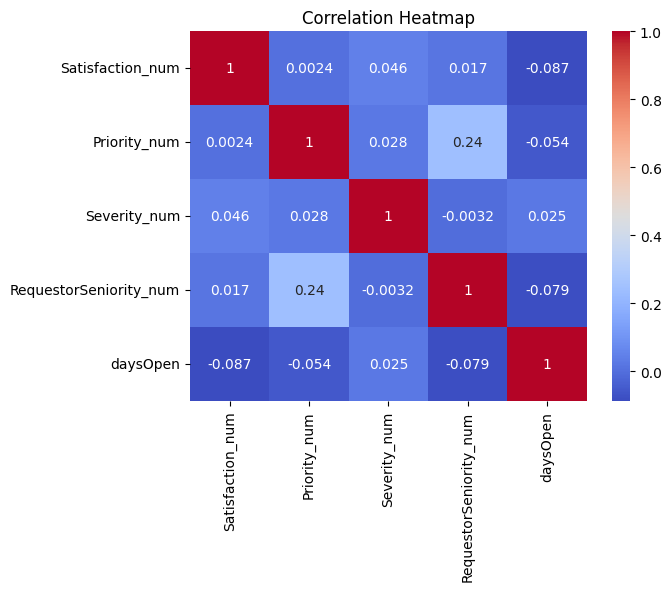

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##EDA Interpretation Based on Correlation Heatmap

The correlation heatmap provides insights into how numeric variables relate to each other, particularly focusing on customer satisfaction (Satisfaction_num) in the context of IT Helpdesk service effectiveness.

1. Correlation with Satisfaction_num


+daysOpen	     -0.087	     Weak negative relationship: the longer a ticket is open, the less satisfied the customer tends to be.

+Priority_num	 +0.0024	   Almost no correlation -  priority level doesn’t significantly affect satisfaction.

+Severity_num	 +0.046	     Slight positive relationship – higher severity might lead to more satisfaction, though not strongly.

RequestorSeniority_num	+0.017	Negligible effect – seniority of requester has minimal influence on satisfaction.

Key findings:

Although the correlation coefficients are all small (|r| < 0.1), daysOpen is the variable with the most obvious negative impact on Satisfaction.

Factors such as Priority, Severity, and Seniority have almost zero correlation with satisfaction → need to be further tested with other analyses (classification distortion).

2. Correlation between other variables

Combined variable Correlation coefficient Interpretation

Priority_num & RequestorSeniority_num +0.24 Seniors are more likely to request priority

daysOpen & RequestorSeniority_num -0.079 Seniors can process faster (indirectly)


##Conclusion & Recommendations

📉 Reduce ticket resolution time (daysOpen): it's the most important factor (though still weak) that negatively impacts satisfaction.

📈 Don't rely solely on correlation for actionable insights – the low correlation coefficients suggest non-linear or categorical relationships might be more important (e.g., Satisfaction vs. Severity level by category).

🧪 Further analysis is recommended:
+ Thru PowerBI Diagrams
+ Combine segment analysis by ticket type or handling department for deeper understanding.

###Linear Regression

In [ ]:
X = df_clean[['Satisfaction_num','Priority_num','Severity_num','RequestorSeniority_num']]
y=df_clean['daysOpen']
X=sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               daysOpen   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     383.7
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:14:13   Log-Likelihood:            -3.0514e+05
No. Observations:               95986   AIC:                         6.103e+05
Df Residuals:                   95981   BIC:                         6.103e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      7